#COVID19 EDA (2019-2020)
In this code we will examine the first two years of the COVID19 pandemic, mainly an exploratory analysis of data on which countries the situation was most drastic
En este código examinaremos los primeros dos años de la pandemia COVID19 principalmente un análisis exploratorio de datos  sobre en que países fue más drástica la situación

##Load the libreries - Cargamos nuestras librerías

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px4

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import io

In [2]:
uploaded = files.upload()

Saving country_wise_latest.csv to country_wise_latest.csv


In [4]:
df_country_wise = pd.read_csv(io.StringIO(uploaded['country_wise_latest.csv'].decode('utf-8')))

####We start the EDA starting with descriptive statistics - Empezamos el EDA comenzando con estadística descriptiva

In [7]:
df_country_wise.shape

(187, 15)

In [6]:
df_country_wise.info

<bound method DataFrame.info of          Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Rec

In [8]:
df_country_wise.describe

<bound method NDFrame.describe of          Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  R

##We order the data with the countries where the amount of adversity skyrockets - Ordenamos los datos con los países donde se dispara la cantidad de adversidad

In [11]:
df_country_wise.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [12]:
grouped_df_country_wise = df_country_wise[["Country/Region","Confirmed","Deaths","Recovered"]]
grouped_df_country_wise

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242
...,...,...,...,...
182,West Bank and Gaza,10621,78,3752
183,Western Sahara,10,1,8
184,Yemen,1691,483,833
185,Zambia,4552,140,2815


In [13]:
grouped_df_country_wise = grouped_df_country_wise.sort_values(by="Confirmed",ascending=False)
grouped_df_country_wise = grouped_df_country_wise.reset_index(drop=True)
grouped_df_country_wise

,Country/Region,Confirmed,Deaths,Recovered
0,US,4290259,148011,1325804
1,Brazil,2442375,87618,1846641
2,India,1480073,33408,951166
3,Russia,816680,13334,602249
4,South Africa,452529,7067,274925
...,...,...,...,...
182,Dominica,18,0,18
183,Saint Kitts and Nevis,17,0,15
184,Greenland,14,0,13
185,Holy See,12,0,12


##We graph the data of the countries on the most confirmed cases - Graficamos los datos de los países sobre casos más confirmados

In [14]:
px.bar(grouped_df_country_wise[0:10], x="Country/Region", y="Confirmed",title="Top 10 Countries with confirmed cases")

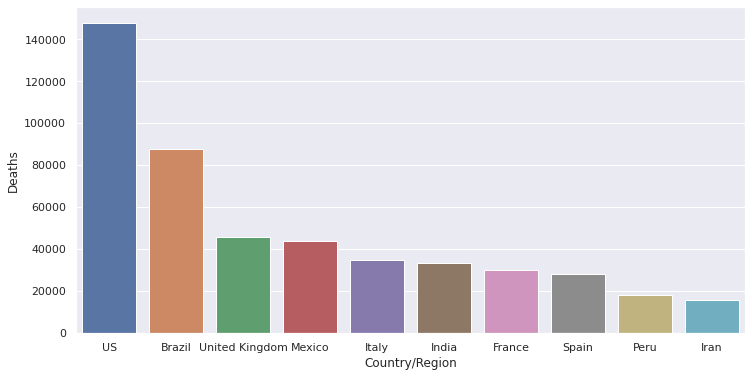

In [15]:
sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(x='Country/Region', y='Deaths', data=grouped_df_country_wise.nlargest(10,'Deaths'))
plt.show()

In [16]:
px.pie(grouped_df_country_wise[0:10],values="Confirmed",names="Country/Region")

##Without losing generality, we carry out the same process with a dataframe on the growth of cases in the world - Sin perdida de generalidad realizamos el mismo proceso con un dataframe sobre crecimiento de casos en el mundo


In [17]:
uploaded1 = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [20]:
df_covid_19_clean = pd.read_csv(io.StringIO(uploaded1['covid_19_clean_complete.csv'].decode('utf-8')))

In [21]:
df_covid_19_clean.shape

(49068, 10)

In [22]:
df_covid_19_clean.info

<bound method DataFrame.info of       Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27

In [24]:
df_covid_19_clean.describe

<bound method NDFrame.describe of       Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-

In [25]:
df_covid_19_clean.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [26]:
df_covid_19_clean.drop(columns=['Province/State'], inplace=True)
df_covid_19_clean.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [27]:
df_covid_19_clean_new= df_covid_19_clean.groupby(['Date'])[['Confirmed','Deaths']].sum().reset_index()
df_covid_19_clean_new

,Date,Confirmed,Deaths
0,2020-01-22,555,17
1,2020-01-23,654,18
2,2020-01-24,941,26
3,2020-01-25,1434,42
4,2020-01-26,2118,56
...,...,...,...
183,2020-07-23,15510481,633506
184,2020-07-24,15791645,639650
185,2020-07-25,16047190,644517
186,2020-07-26,16251796,648621


##Finally we make a graph of how the cases were growing throughout 2020 - Finalmente hacemos una gráfica de como fueron creciendo los casos en todo el 2020

In [28]:
px.line(df_covid_19_clean_new,x="Date",y="Confirmed",title="World Wide Confirmed Cases ")